In [1]:
# Loading required packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(breakaway)
library(vegan)
library(ade4)
library(wesanderson)
#library(ggdendro)
#library(DESeq2)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4


In [2]:
ps = readRDS(file="CHTC/Dada2_Results_OA20_PEAR_Full/ps.fungi")

In [3]:
ps.norm = transform_sample_counts(ps, function(x) (x / sum(x)))
ps.norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5938 taxa and 101 samples ]
sample_data() Sample Data:       [ 101 samples by 103 sample variables ]
tax_table()   Taxonomy Table:    [ 5938 taxa by 16 taxonomic ranks ]

## Getting dist matrix

In [4]:
# Pulling out samples from this project only
#ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)
ps.norm.org = prune_samples(sample_data(ps.norm)$Org_or_Min %in% c("O"), ps.norm)
ps.norm.min = prune_samples(sample_data(ps.norm)$Org_or_Min %in% c("M"), ps.norm)
ps.norm.org.merged = merge_samples(ps.norm.org, "Site_ID")
ps.norm.min.merged = merge_samples(ps.norm.min, "Site_ID")
ps.norm.org.merged.norm = transform_sample_counts(ps.norm.org.merged, function(x) x / sum(x) )
ps.norm.min.merged.norm = transform_sample_counts(ps.norm.min.merged, function(x) x / sum(x) )

In [5]:
Dist.org.fun = as.matrix(distance(ps.norm.org.merged, method="bray", type="samples"))
Dist.min.fun = as.matrix(distance(ps.norm.min.merged, method="bray", type="samples"))

In [6]:
Dist.veg = read.csv("../../../../../../../Users/Thea/Documents/Madison/Box\ Sync/WhitmanLabMaster/WhitmanLab/Projects/WoodBuffalo/WB2015/data/Veg_properties/WBNPNWT_Vegetation_Braydistance_2015.csv")
row.names(Dist.veg)=Dist.veg$X
Dist.veg=Dist.veg[,2:dim(Dist.veg)[2]]
colnames(Dist.veg)=row.names(Dist.veg)

In [7]:
min(Dist.veg[Dist.veg!=0])

[1] 0.2236426

In [8]:
OrgSamples = colnames(as.matrix(Dist.org.fun))[colnames(as.matrix(Dist.org.fun)) %in% colnames(as.matrix(Dist.veg))]
MinSamples = colnames(as.matrix(Dist.min.fun))[colnames(as.matrix(Dist.min.fun)) %in% colnames(as.matrix(Dist.veg))]

In [9]:
Dist.org.veg = Dist.veg[row.names(Dist.veg) %in% OrgSamples,colnames(Dist.veg) %in% OrgSamples]
Dist.min.veg = Dist.veg[row.names(Dist.veg) %in% MinSamples,colnames(Dist.veg) %in% MinSamples]
Dist.org.fun = Dist.org.fun[row.names(Dist.org.fun) %in% OrgSamples,colnames(Dist.org.fun) %in% OrgSamples]
Dist.min.fun = Dist.min.fun[row.names(Dist.min.fun) %in% MinSamples,colnames(Dist.min.fun) %in% MinSamples]

In [10]:
colnames(Dist.min.fun) == colnames(Dist.min.veg)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE

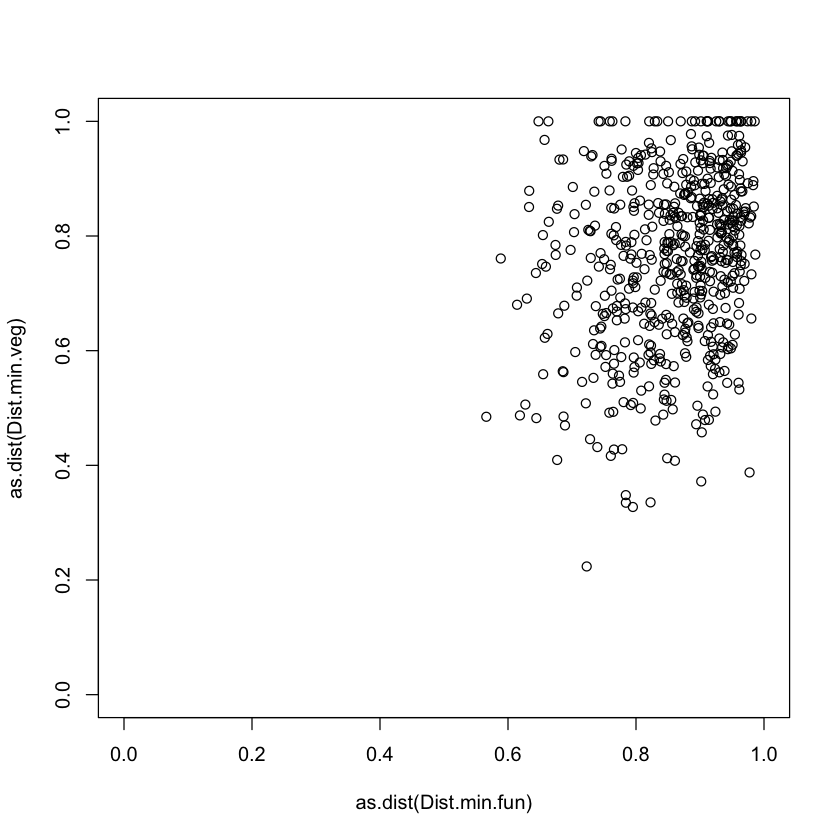

In [11]:
plot(as.dist(Dist.min.fun),as.dist(Dist.min.veg),xlim=c(0,1), ylim=c(0,1))
# colour by distance matrix of burn severity metrics
# colour by distnace matrix of soils

## Mantel tests

In [12]:
Uplands = sample_data(ps)[sample_data(ps)$Land_Class=="Upland"]$Site_ID
Wetlands = sample_data(ps)[sample_data(ps)$Land_Class=="Wetland"]$Site_ID

In [13]:
Dist.org.veg.up =Dist.org.veg[row.names(Dist.org.veg) %in% Uplands ,colnames(Dist.org.veg) %in% Uplands]
Dist.min.veg.up =Dist.min.veg[row.names(Dist.min.veg) %in% Uplands ,colnames(Dist.min.veg) %in% Uplands]
Dist.org.fun.up =Dist.org.fun[row.names(Dist.org.fun) %in% Uplands ,colnames(Dist.org.fun) %in% Uplands]
Dist.min.fun.up =Dist.min.fun[row.names(Dist.min.fun) %in% Uplands ,colnames(Dist.min.fun) %in% Uplands]
Dist.org.veg.wet =Dist.org.veg[row.names(Dist.org.veg) %in% Wetlands ,colnames(Dist.org.veg) %in% Wetlands]
Dist.min.veg.wet =Dist.min.veg[row.names(Dist.min.veg) %in% Wetlands ,colnames(Dist.min.veg) %in% Wetlands]
Dist.org.fun.wet =Dist.org.fun[row.names(Dist.org.fun) %in% Wetlands ,colnames(Dist.org.fun) %in% Wetlands]
Dist.min.fun.wet =Dist.min.fun[row.names(Dist.min.fun) %in% Wetlands ,colnames(Dist.min.fun) %in% Wetlands]

In [14]:
mantel.rtest(m1 = as.dist(Dist.org.veg.up), m2 = as.dist(Dist.org.fun.up), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: -0.01504688 

Based on 9999 replicates
Simulated p-value: 0.5658 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
-0.2009542038  0.0009135372  0.0063080374 

In [15]:
mantel.rtest(m1 = as.dist(Dist.org.veg.wet), m2 = as.dist(Dist.org.fun.wet), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.4301884 

Based on 9999 replicates
Simulated p-value: 1e-04 
Alternative hypothesis: greater 

    Std.Obs Expectation    Variance 
 3.89274636 -0.00211435  0.01233286 

In [16]:
mantel.rtest(m1 = as.dist(Dist.min.veg.up), m2 = as.dist(Dist.min.fun.up), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.2331916 

Based on 9999 replicates
Simulated p-value: 0.0042 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
 2.6735077527 -0.0004337841  0.0076361948 

In [17]:
mantel.rtest(m1 = as.dist(Dist.min.veg.wet), m2 = as.dist(Dist.min.fun.wet), nrepet = 9999)

Monte-Carlo test
Call: mantel.rtest(m1 = as.dist(Dist.min.veg.wet), m2 = as.dist(Dist.min.fun.wet), 
    nrepet = 9999)

Observation: -0.8976545 

Based on 9999 replicates
Simulated p-value: 0.8343 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
-1.2692019456 -0.0003863348  0.4997848114 

## Plots

In [18]:
# Making a matrix with one data entry for each site
SamDat = sample_data(ps.norm)[!duplicated(sample_data(ps.norm)$Site_ID),]
rownames(SamDat) = SamDat$Site_ID

In [19]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.fun)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Fun_dist","Veg_dist")

for (i in df$Site_ID_1){
    df$Land_Class_1[df$Site_ID_1==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}

head(df)

Site_ID_1,Site_ID_2,Fun_dist,Veg_dist,Land_Class_1
15S-NT-19,15S-NT-19,0.0000000,0.0000000,Wetland
15S-NT-20,15S-NT-19,0.7032652,0.9747800,Wetland
15S-NT-21,15S-NT-19,0.6677345,0.9586553,Wetland
15S-NT-22,15S-NT-19,0.9649712,0.7329424,Upland
15S-NT-23,15S-NT-19,1.0000000,0.9167678,Upland
15S-NT-24,15S-NT-19,0.9657845,0.7178454,Upland


In [20]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.fun)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Fun_dist","Veg_dist")
#df$X1==df$X1.1 # making sure the contrasts are the same

# Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in paste(df$Site_ID_1)){
    df$Land_Class_1[df$Site_ID_1==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Land_Class_2[df$Site_ID_2==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Site_ID_1){
    df$Veg_Comm_1[df$Site_ID_1==i] = paste(SamDat$Veg_Comm[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Veg_Comm_2[df$Site_ID_2==i] = paste(SamDat$Veg_Comm[SamDat$Site_ID==i])
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Burned_Unburned
for (i in df$Site_ID_1){
    df$Burned_Unburned_1[df$Site_ID_1==i] = paste(SamDat$Burned_Unburned[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Burned_Unburned_2[df$Site_ID_2==i] = paste(SamDat$Burned_Unburned[SamDat$Site_ID==i])
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Site_ID_1){
    df$Burn_Severity_Index_1[df$Site_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burn_Severity_Index_2[df$Site_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Site_ID_1){
    df$CBI_1[df$Site_ID_1==i] = SamDat$CBI[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$CBI_2[df$Site_ID_2==i] = SamDat$CBI[SamDat$Site_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2

# And why not pH?
for (i in df$Site_ID_1){
    df$pH_1[df$Site_ID_1==i] = SamDat$pH[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$pH_2[df$Site_ID_2==i] = SamDat$pH[SamDat$Site_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2

# And let's add Severity_Class
for (i in df$Site_ID_1){
    df$Severity_Class_1[df$Site_ID_1==i] = paste(SamDat$Severity_Class[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Severity_Class_2[df$Site_ID_2==i] = paste(SamDat$Severity_Class[SamDat$Site_ID==i])
}
df$Severity_Class_2 = ordered(df$Severity_Class_2,levels=c("High", "Moderate", "Low"))
df$Severity_Class_1 = ordered(df$Severity_Class_1,levels=c("Low", "Moderate", "High"))
df$Severity_Class = ifelse(df$Severity_Class_1==df$Severity_Class_2,paste(df$Severity_Class_1),"Different")
df$Severity_Class = ordered(df$Severity_Class,levels=c("Low", "Moderate", "High","Different"))

### Start here with dist matrices

In [21]:
#saveRDS(df,file="CHTC/Dada2_Results_OA20_PEAR_Full/DistMatrix.plant-fungi.O")
#saveRDS(df,file="CHTC/Dada2_Results_OA20_PEAR_Full/DistMatrix.plant-fungi.M")
df = readRDS(df,file="CHTC/Dada2_Results_OA20_PEAR_Full/DistMatrix.plant-fungi.O")
df = readRDS(df,file="CHTC/Dada2_Results_OA20_PEAR_Full/DistMatrix.plant-fungi.M")

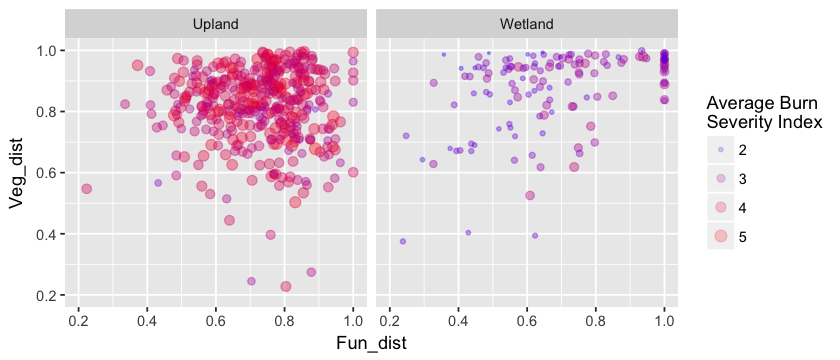

In [22]:
options(repr.plot.width=7, repr.plot.height=3)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)%>%
    #filter(Veg_Comm != "Different")%>%
    filter(Land_Class!= "Different")

p = ggplot(df.no0 , aes(y=Veg_dist, x=Fun_dist, color=Burn_Severity_Index_Mean, size=Burn_Severity_Index_Mean))
p = p + geom_point(alpha=0.2) + scale_color_gradient(low="blue",high="red")
p = p + facet_wrap(~Land_Class) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + scale_size(range=c(0,3))
#p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p = p + guides(color=guide_legend(title="Average Burn\nSeverity Index"),size=guide_legend(title="Average Burn\nSeverity Index"))
#p = p + geom_abline(intercept=0,slope=1, linetype=2)
p

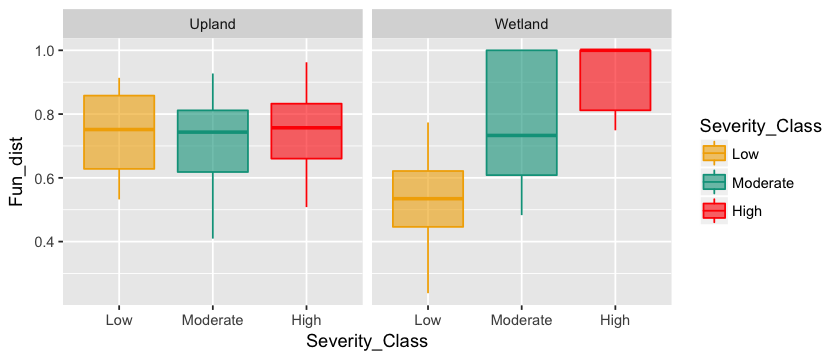

In [23]:
# Want to compare distances across categories

options(repr.plot.width=7, repr.plot.height=3)

df.no0 = df %>%
    #filter(!is.na(Severity_Class_1))%>%
    #filter(!is.na(Severity_Class_2))%>%
    filter(Severity_Class!="Different")%>%
    filter(Site_ID_1 != Site_ID_2)%>%
    filter(Land_Class != "Different")#%>%
    #filter(Veg_Comm != "Different")%>%


p = ggplot(df.no0 , aes(y=Fun_dist, x=Severity_Class, colour=Severity_Class,fill=Severity_Class))
p = p + geom_boxplot(alpha=0.6) #+ scale_color_gradient(low="yellow",high="red3")
palette=wes_palette("Darjeeling",4)[3:1]
p = p + scale_color_manual(values=palette)
p = p + scale_fill_manual(values=palette)
p = p + facet_grid(~Land_Class, scales="free") 
#p = p + scale_x_continuous(limits = c(0.2,1))
#p = p + scale_y_continuous(limits = c(0.2,1))
p

## Trying to run it with fung-bact

In [65]:
Dist.mb = as.matrix(read.csv("../../data/Seq_data/16S/CHTC/Dada2_Results_Full/Dist.mb.csv",row.names=1))
colnames(Dist.mb)=row.names(Dist.mb)
# Got the MB distance matrix.

In [66]:
Dist.fun = as.matrix(distance(ps.norm, method="bray", type="samples"))
colnames(Dist.mb)=row.names(Dist.mb)

In [67]:
CommonNames = colnames(Dist.mb)[colnames(Dist.mb) %in% colnames(Dist.fun)]

In [68]:
CommonNames

[1] "15S-NT-19O"  "15S-NT-20O"  "15S-NT-21M"  "15S-NT-21O"  "15S-NT-22M" 
  [6] "15S-NT-22O"  "15S-NT-23M"  "15S-NT-23O"  "15S-NT-24M"  "15S-NT-24O" 
 [11] "15S-NT-25O"  "15S-NT-26O"  "15S-NT-27M"  "15S-NT-27O"  "15S-NT-28M" 
 [16] "15S-NT-28O"  "15S-NT-29O"  "15S-NT-30M"  "15S-NT-30O"  "15S-NT-31M" 
 [21] "15S-NT-31O"  "15S-NT-32O"  "15S-NT-33M"  "15S-NT-33O"  "15S-NT-34M" 
 [26] "15S-NT-34O"  "15S-NT-35O"  "15S-NT-36O"  "15S-NT-38M"  "15S-NT-38O" 
 [31] "15S-NT-39M"  "15S-NT-39O"  "15S-NT-40M"  "15S-NT-40O"  "15S-NT-41M" 
 [36] "15S-NT-41O"  "15S-NT-42M"  "15S-NT-42O"  "15S-NT-43M"  "15S-NT-44M" 
 [41] "15S-NT-44O"  "15S-NT-45O"  "15S-NT-46M"  "15S-NT-47M"  "15S-NT-47O" 
 [46] "15S-NT-48O"  "15S-NT-49M"  "15S-NT-49O"  "15S-NT-50O"  "15S-NT-51O" 
 [51] "15S-NT-52O"  "15S-NT-U06O" "15S-NT-U07M" "15S-NT-U07O" "15S-NT-U08M"
 [56] "15S-NT-U08O" "15S-NT-U09M" "15S-NT-U09O" "15S-NT-U10M" "15S-NT-U10O"
 [61] "15S-NT-U11O" "15S-NT-U12O" "15S-WB-01M"  "15S-WB-01O"  "15S-WB-02O" 
 [66] "15S-WB-04M"  "15S-WB-05M"  "15S-WB-05O"  "15S-WB-06M"  "15S-WB-06O" 
 [71] "15S-WB-07M"  "15S-WB-07O"  "15S-WB-08M"  "15S-WB-08O"  "15S-WB-09M" 
 [76] "15S-WB-09O"  "15S-WB-10M"  "15S-WB-10O"  "15S-WB-11M"  "15S-WB-11O" 
 [81] "15S-WB-12M"  "15S-WB-12O"  "15S-WB-13O"  "15S-WB-14M"  "15S-WB-14O" 
 [86] "15S-WB-15M"  "15S-WB-15O"  "15S-WB-16M"  "15S-WB-16O"  "15S-WB-17M" 
 [91] "15S-WB-17O"  "15S-WB-18M"  "15S-WB-U01M" "15S-WB-U01O" "15S-WB-U02O"
 [96] "15S-WB-U03M" "15S-WB-U03O" "15S-WB-U04M" "15S-WB-U04O" "15S-WB-U05M"
[101] "15S-WB-U05O"

In [69]:
Dist.mb = Dist.mb[row.names(Dist.mb) %in% CommonNames,colnames(Dist.mb) %in% CommonNames]
Dist.fun = Dist.fun[row.names(Dist.fun) %in% CommonNames,colnames(Dist.fun) %in% CommonNames]
dim(Dist.mb) == dim(Dist.fun)

[1] TRUE TRUE

Got the matrices

## Mantel tests

In [70]:
Uplands = sample_data(ps)[sample_data(ps)$Land_Class=="Upland"]$Sample_ID
Wetlands = sample_data(ps)[sample_data(ps)$Land_Class=="Wetland"]$Sample_ID

Mineral = sample_data(ps)[sample_data(ps)$Org_or_Min=="M"]$Sample_ID
Organic = sample_data(ps)[sample_data(ps)$Org_or_Min=="O"]$Sample_ID

In [71]:
Dist.fun.up = Dist.fun[row.names(Dist.fun) %in% Uplands, colnames(Dist.fun) %in% Uplands]
Dist.mb.up = Dist.mb[row.names(Dist.mb) %in% Uplands, colnames(Dist.mb) %in% Uplands]
Dist.fun.wet = Dist.fun[row.names(Dist.fun) %in% Wetlands, colnames(Dist.fun) %in% Wetlands]
Dist.mb.wet = Dist.mb[row.names(Dist.mb) %in% Wetlands, colnames(Dist.mb) %in% Wetlands]

In [73]:
Dist.fun.up.org =Dist.fun.up[row.names(Dist.fun.up) %in% Organic ,colnames(Dist.fun.up) %in% Organic]
Dist.mb.up.org =Dist.mb.up[row.names(Dist.mb.up) %in% Organic ,colnames(Dist.mb.up) %in% Organic]
Dist.fun.wet.org =Dist.fun.wet[row.names(Dist.fun.wet) %in% Organic ,colnames(Dist.fun.wet) %in% Organic]
Dist.mb.wet.org =Dist.mb.wet[row.names(Dist.mb.wet) %in% Organic ,colnames(Dist.mb.wet) %in% Organic]

In [74]:
mantel.rtest(m1 = as.dist(Dist.fun.up.org), m2 = as.dist(Dist.mb.up.org), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.4473578 

Based on 9999 replicates
Simulated p-value: 1e-04 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
7.7220255225 0.0003560284 0.0033508585 

In [75]:
mantel.rtest(m1 = as.dist(Dist.fun.wet.org), m2 = as.dist(Dist.mb.wet.org), nrepet = 9999)

Monte-Carlo test
Call: mantel.rtest(m1 = as.dist(Dist.fun.wet.org), m2 = as.dist(Dist.mb.wet.org), 
    nrepet = 9999)

Observation: 0.5345919 

Based on 9999 replicates
Simulated p-value: 1e-04 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
 6.1770480678 -0.0002573313  0.0074972280 

In [76]:
mantel.rtest(m1 = as.dist(Dist.fun.up), m2 = as.dist(Dist.mb.up), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.4395487 

Based on 9999 replicates
Simulated p-value: 1e-04 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
1.153649e+01 2.850095e-04 1.449785e-03 

In [77]:
mantel.rtest(m1 = as.dist(Dist.fun.wet), m2 = as.dist(Dist.mb.wet), nrepet = 9999)

Monte-Carlo test
Call: mantel.rtest(m1 = as.dist(Dist.fun.wet), m2 = as.dist(Dist.mb.wet), 
    nrepet = 9999)

Observation: 0.5460696 

Based on 9999 replicates
Simulated p-value: 1e-04 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
 7.4032958152 -0.0004662562  0.0054498825 

In [78]:
mantel.rtest(m1 = as.dist(Dist.fun), m2 = as.dist(Dist.mb), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.4947135 

Based on 9999 replicates
Simulated p-value: 1e-04 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
 1.410841e+01 -7.587333e-05  1.229942e-03 

In [79]:
# Making a matrix with one data entry for each site
SamDat = sample_data(ps.norm)[!duplicated(sample_data(ps.norm)$Sample_ID),]
rownames(SamDat) = SamDat$Sample_ID

In [80]:
head(SamDat$Land_Class)

[1] Wetland Wetland Wetland Wetland Upland  Upland 
Levels: Upland Wetland

In [81]:
df = data.frame(melt(as.matrix(Dist.fun)),melt(as.matrix(Dist.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Sample_ID_1","Sample_ID_2","Fun_dist","Mb_dist")
#df$X1==df$X1.1 # making sure the contrasts are the same

# Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in df$Sample_ID_1){
    df$Land_Class_1[df$Sample_ID_1==i] = paste(SamDat$Land_Class[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Land_Class_2[df$Sample_ID_2==i] = paste(SamDat$Land_Class[SamDat$Sample_ID==i])
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Sample_ID_1){
    df$Veg_Comm_1[df$Sample_ID_1==i] = paste(SamDat$Veg_Comm[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Veg_Comm_2[df$Sample_ID_2==i] = paste(SamDat$Veg_Comm[SamDat$Sample_ID==i])
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Burned_Unburned
for (i in df$Sample_ID_1){
    df$Burned_Unburned_1[df$Sample_ID_1==i] = paste(SamDat$Burned_Unburned[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Burned_Unburned_2[df$Sample_ID_2==i] = paste(SamDat$Burned_Unburned[SamDat$Sample_ID==i])
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Sample_ID_1){
    df$Burn_Severity_Index_1[df$Sample_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$Burn_Severity_Index_2[df$Sample_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Sample_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Sample_ID_1){
    df$CBI_1[df$Sample_ID_1==i] = SamDat$CBI[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$CBI_2[df$Sample_ID_2==i] = SamDat$CBI[SamDat$Sample_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2

# And why not pH?
for (i in df$Sample_ID_1){
    df$pH_1[df$Sample_ID_1==i] = SamDat$pH[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$pH_2[df$Sample_ID_2==i] = SamDat$pH[SamDat$Sample_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2

# And let's add Severity_Class
for (i in df$Sample_ID_1){
    df$Severity_Class_1[df$Sample_ID_1==i] = paste(SamDat$Severity_Class[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Severity_Class_2[df$Sample_ID_2==i] = paste(SamDat$Severity_Class[SamDat$Sample_ID==i])
}
df$Severity_Class_2 = ordered(df$Severity_Class_2,levels=c("High", "Moderate", "Low", "Unburned"))
df$Severity_Class_1 = ordered(df$Severity_Class_1,levels=c("Unburned","Low", "Moderate", "High"))
df$Severity_Class = ifelse(df$Severity_Class_1==df$Severity_Class_2,paste(df$Severity_Class_1),"Different")
df$Severity_Class = ordered(df$Severity_Class,levels=c("Unburned","Low", "Moderate", "High","Different"))

# Let's add Org_or_Min
for (i in df$Sample_ID_1){
    df$Org_or_Min_1[df$Sample_ID_1==i] = paste(SamDat$Org_or_Min[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Org_or_Min_2[df$Sample_ID_2==i] = paste(SamDat$Org_or_Min[SamDat$Sample_ID==i])
}
df$Org_or_Min = ifelse(df$Org_or_Min_1==df$Org_or_Min_2,df$Org_or_Min_1,"Different")


In [82]:
#saveRDS(df,file="CHTC/Dada2_Results_OA20_PEAR_Full/DistMatrix.bact-fungi")
df = readRDS(df,file="CHTC/Dada2_Results_OA20_PEAR_Full/DistMatrix.bact-fungi")

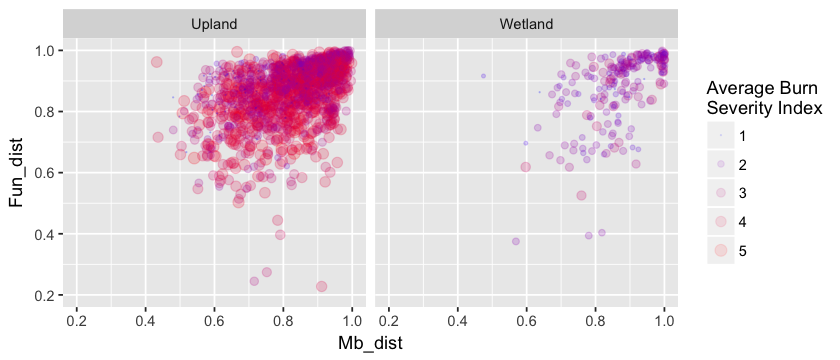

In [83]:
options(repr.plot.width=7, repr.plot.height=3)

df.no0 = df %>%
    filter(Sample_ID_1 != Sample_ID_2)%>%
    filter(Land_Class != "Different")%>%
    filter(Org_or_Min != "Different")

p = ggplot(df.no0 , aes(y=Fun_dist, x=Mb_dist, color=Burn_Severity_Index_Mean, size=Burn_Severity_Index_Mean))
p = p + geom_point(alpha=0.1) + scale_color_gradient(low="blue",high="red")
p = p + facet_grid(~Land_Class) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + scale_size(range=c(0,3))
p = p + guides(color=guide_legend(title="Average Burn\nSeverity Index"),size=guide_legend(title="Average Burn\nSeverity Index"))
#p = p + geom_abline(intercept=0,slope=1, linetype=2)
p

In [84]:
df.no0 = df %>%
    filter(Sample_ID_1 != Sample_ID_2)%>%
    #filter(Veg_Comm != "Different")%>%
    filter(Org_or_Min == "O")%>%
    filter(Land_Class == "Wetland")
aov = lm(data=df.no0,Fun_dist~Mb_dist)
summary(aov)
aov


Call:
lm(formula = Fun_dist ~ Mb_dist, data = df.no0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44340 -0.04078  0.02740  0.06101  0.29079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.31992    0.04336   7.378 8.73e-13 ***
Mb_dist      0.64381    0.04978  12.933  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1003 on 418 degrees of freedom
Multiple R-squared:  0.2858,	Adjusted R-squared:  0.2841 
F-statistic: 167.3 on 1 and 418 DF,  p-value: < 2.2e-16



Call:
lm(formula = Fun_dist ~ Mb_dist, data = df.no0)

Coefficients:
(Intercept)      Mb_dist  
     0.3199       0.6438  


In [85]:
df.no0 = df %>%
    filter(Sample_ID_1 != Sample_ID_2)%>%
    #filter(Veg_Comm != "Different")%>%
    filter(Org_or_Min == "O")%>%
    filter(Land_Class == "Upland")
aov = lm(data=df.no0,Fun_dist~Mb_dist)
summary(aov)
aov


Call:
lm(formula = Fun_dist ~ Mb_dist, data = df.no0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66561 -0.05095  0.02032  0.07057  0.28766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.47669    0.02049   23.27   <2e-16 ***
Mb_dist      0.45711    0.02506   18.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1038 on 1330 degrees of freedom
Multiple R-squared:  0.2001,	Adjusted R-squared:  0.1995 
F-statistic: 332.8 on 1 and 1330 DF,  p-value: < 2.2e-16



Call:
lm(formula = Fun_dist ~ Mb_dist, data = df.no0)

Coefficients:
(Intercept)      Mb_dist  
     0.4767       0.4571  


In [86]:
df$Severity_Class

[1] Moderate  Different Different Different Moderate  Moderate  Different
    [8] Different Different Different Different Moderate  Moderate  Moderate 
   [15] Different Different Different Different Different Moderate  Moderate 
   [22] Different Different Different Different Different Different Different
   [29] Moderate  Moderate  Different Different Moderate  Moderate  Different
   [36] Different Different Different Moderate  Moderate  Moderate  Different
   [43] Different Different Different Moderate  Moderate  Moderate  Different
   [50] Different Different Different Different Different Different Different
   [57] Different Different Different Different Different Different Different
   [64] Different Moderate  Different Different Different Different Different
   [71] Different Different Different Different Moderate  Moderate  Moderate 
   [78] Moderate  Different Different Moderate  Moderate  Different Different
   [85] Different Moderate  Moderate  Different Different Different Different
   [92] Different Different Different Different Different Different Different
   [99] Different Different Different Different Low       Low       Low      
  [106] Different Different Low       Low       Low       Low       Low      
  [113] Different Different Different Different Different Different Different
  [120] Different Different Different Low       Different Different Different
  [127] Different Low       Different Different Different Low       Low      
  [134] Different Different Low       Low       Different Different Different
  [141] Different Different Low       Different Different Different Different
  [148] Different Different Low       Low       Low       Different Different
  [155] Different Different Different Different Different Different Different
  [162] Different Different Different Different Different Different Different
  [169] Different Low       Low       Different Different Low       Low      
  [176] Different Different Different Different Low       Low       Different
  [183] Different Different Different Different Different Different Different
  [190] Different Different Different Different Different Different Different
  [197] Different Different Different Different Different Different Different
  [204] Low       Low       Low       Different Different Low       Low      
  [211] Low       Low       Low       Different Different Different Different
  [218] Different Different Different Different Different Different Low      
  [225] Different Different Different Different Low       Different Different
  [232] Different Low       Low       Different Different Low       Low      
  [239] Different Different Different Different Different Low       Different
  [246] Different Different Different Different Different Low       Low      
  [253] Low       Different Different Different Different Different Different
  [260] Different Different Different Different Different Different Different
  [267] Different Different Different Different Low       Low       Different
  [274] Different Low       Low       Different Different Different Different
  [281] Low       Low       Different Different Different Different Different
  [288] Different Different Different Different Different Different Different
  [295] Different Different Different Different Different Different Different
  [302] Different Different Different Low       Low       Low       Different
  [309] Different Low       Low       Low       Low       Low       Different
  [316] Different Different Different Different Different Different Different
  [323] Different Different Low       Different Different Different Different
  [330] Low       Different Different Different Low       Low       Different
  [337] Different Low       Low       Different Different Different Different
  [344] Different Low       Different Different Different Different Different
  [351] Different Low       Low       Low       Different Different Different
  [358] Different Differen

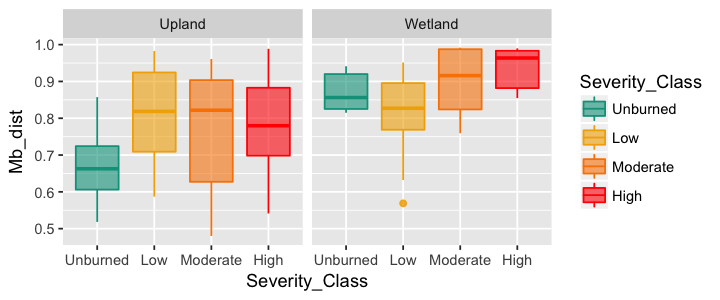

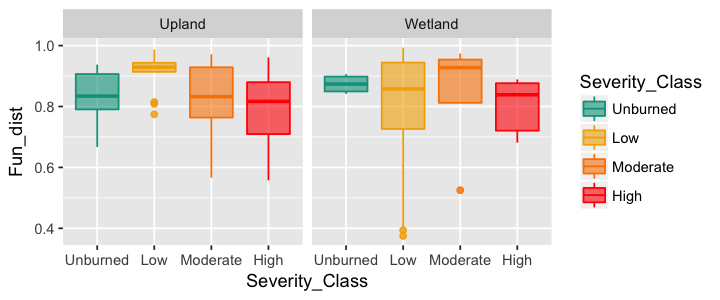

In [87]:
# Want to compare distances across categories

options(repr.plot.width=6, repr.plot.height=2.5)

df.no0 = df %>%
    #filter(!is.na(Severity_Class_1))%>%
    #filter(!is.na(Severity_Class_2))%>%
    filter(Severity_Class!="Different")%>%
    filter(Sample_ID_1 != Sample_ID_2)%>%
    filter(Land_Class != "Different")%>%
    filter(Veg_Comm != "Different")%>%
    filter(Org_or_Min != "Different")

#df.no0$Org_or_Min = as.factor(df.no0$Org_or_Min)
#levels(df.no0$Org_or_Min) = c("Mineral","Organic")

p = ggplot(df.no0 , aes(y=Mb_dist, x=Severity_Class, colour=Severity_Class,fill=Severity_Class))
p = p + geom_boxplot(alpha=0.6)
palette=wes_palette("Darjeeling",4)[c(2,3,4,1)]
p = p + scale_color_manual(values=palette)
p = p + scale_fill_manual(values=palette)
p = p + facet_grid(~Land_Class, scales="free") 
#p = p + scale_x_continuous(limits = c(0.2,1))
#p = p + scale_y_continuous(limits = c(0.2,1))
p

p = ggplot(df.no0 , aes(y=Fun_dist, x=Severity_Class, colour=Severity_Class,fill=Severity_Class))
p = p + geom_boxplot(alpha=0.6)
palette=wes_palette("Darjeeling",4)[c(2,3,4,1)]
p = p + scale_color_manual(values=palette)
p = p + scale_fill_manual(values=palette)
p = p + facet_grid(~Land_Class, scales="free") 
#p = p + scale_x_continuous(limits = c(0.2,1))
#p = p + scale_y_continuous(limits = c(0.2,1))
p

In [88]:
df.no0 = df %>%
    #filter(!is.na(Severity_Class_1))%>%
    #filter(!is.na(Severity_Class_2))%>%
    filter(Severity_Class!="Different")%>%
    filter(Sample_ID_1 != Sample_ID_2)%>%
    filter(Land_Class == "Upland")%>%
    filter(Veg_Comm != "Different")#%>%
    #filter(Org_or_Min == "M")

aov = aov(data=df.no0, Mb_dist~Severity_Class)
summary(aov)
HSD = TukeyHSD(aov,"Severity_Class")
HSD

                Df Sum Sq Mean Sq F value  Pr(>F)    
Severity_Class   3  0.416 0.13853   9.105 6.9e-06 ***
Residuals      540  8.215 0.01521                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Mb_dist ~ Severity_Class, data = df.no0)

$Severity_Class
                           diff         lwr        upr     p adj
Low-Unburned       0.0840081151  0.03198539 0.13603084 0.0002149
Moderate-Unburned  0.0760089359  0.03042617 0.12159171 0.0001204
High-Unburned      0.0768903293  0.03642821 0.11735245 0.0000077
Moderate-Low      -0.0079991793 -0.05551984 0.03952148 0.9726355
High-Low          -0.0071177859 -0.04975119 0.03551562 0.9732713
High-Moderate      0.0008813934 -0.03360096 0.03536374 0.9998974


## What if we were wondering whether this relationship breaks down with severe fires? I.e., bact and fungal communities become less similar.

                Df Sum Sq Mean Sq F value Pr(>F)  
Severity_Class   3 0.2083 0.06945   2.782 0.0441 *
Residuals      116 2.8955 0.02496                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = DistanceRatio ~ Severity_Class, data = df.no0.Wet)

$Severity_Class
                          diff        lwr        upr     p adj
Low-Unburned       0.008966423 -0.1646771 0.18260990 0.9991246
Moderate-Unburned -0.066643163 -0.2607825 0.12749615 0.8075543
High-Unburned     -0.150056029 -0.3878272 0.08771510 0.3576828
Moderate-Low      -0.075609585 -0.1819441 0.03072489 0.2539803
High-Low          -0.159022452 -0.3326659 0.01462103 0.0852261
High-Moderate     -0.083412866 -0.2775522 0.11072644 0.6780008


                Df Sum Sq Mean Sq F value   Pr(>F)    
Severity_Class   3  0.986  0.3286   10.99 5.18e-07 ***
Residuals      540 16.150  0.0299                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = DistanceRatio ~ Severity_Class, data = df.no0.Up)

$Severity_Class
                         diff         lwr          upr     p adj
Low-Unburned      -0.04760311 -0.12054238  0.025336159 0.3342502
Moderate-Unburned -0.10124586 -0.16515589 -0.037335828 0.0002986
High-Unburned     -0.11721346 -0.17394400 -0.060482918 0.0000009
Moderate-Low      -0.05364275 -0.12026983  0.012984331 0.1626732
High-Low          -0.06961035 -0.12938518 -0.009835522 0.0148972
High-Moderate     -0.01596760 -0.06431412  0.032378914 0.8298589


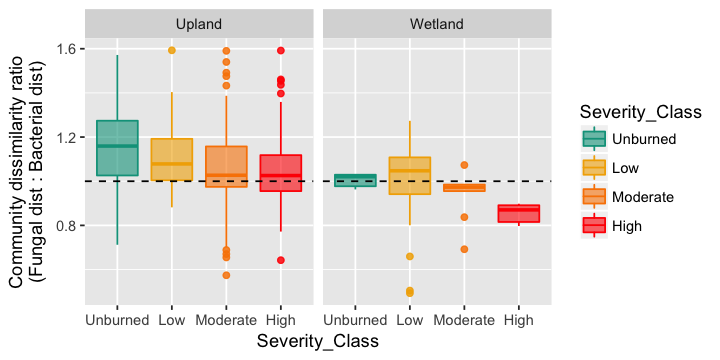

In [89]:
# Want to compare distances across categories

options(repr.plot.width=6, repr.plot.height=3)

df.no0 = df %>%
    #filter(!is.na(Severity_Class_1))%>%
    #filter(!is.na(Severity_Class_2))%>%
    filter(Severity_Class!="Different")%>%
    filter(Sample_ID_1 != Sample_ID_2)%>%
    filter(Land_Class != "Different")%>%
    filter(Veg_Comm != "Different")#%>%
    #filter(Org_or_Min != "Different")

df.no0 = df.no0 %>%
    mutate(DistanceRatio=Fun_dist/Mb_dist)

#df.no0$Org_or_Min = as.factor(df.no0$Org_or_Min)
#levels(df.no0$Org_or_Min) = c("Mineral","Organic")

p = ggplot(df.no0 , aes(y=DistanceRatio, x=Severity_Class, colour=Severity_Class,fill=Severity_Class))
p = p + geom_boxplot(alpha=0.6) #+ scale_color_gradient(low="yellow",high="red3")
palette=wes_palette("Darjeeling",4)[c(2,3,4,1)]
p = p + scale_color_manual(values=palette)
p = p + scale_fill_manual(values=palette)
p = p + facet_grid(~Land_Class, scales="free") 
#p = p + scale_x_continuous(limits = c(0.2,1))
#p = p + scale_y_continuous(limits = c(0.2,1))
p = p + geom_abline(slope=0,intercept=1,linetype="dashed")
p = p + labs(y="Community dissimilarity ratio\n(Fungal dist : Bacterial dist)")
p

df.no0.Wet = df.no0%>%
    filter(Land_Class=="Wetland")

aov = aov(data=df.no0.Wet, DistanceRatio~Severity_Class)
summary(aov)
HSD = TukeyHSD(aov,"Severity_Class")
HSD

df.no0.Up = df.no0%>%
    filter(Land_Class=="Upland")

aov = aov(data=df.no0.Up, DistanceRatio~Severity_Class)
summary(aov)
HSD = TukeyHSD(aov,"Severity_Class")
HSD

## Considering distances by severity

In [90]:
dim(Dist.fun)
dim(Dist.mb)
dim(Dist.veg)

[1] 101 101

[1] 101 101

[1] 51 51

In [91]:
df = data.frame(melt(as.matrix(Dist.veg)))
head(df)

X1,X2,value
15S-NT-19,15S-NT-19,0.0000000
15S-NT-20,15S-NT-19,0.7032652
15S-NT-21,15S-NT-19,0.6677345
15S-NT-22,15S-NT-19,0.9649712
15S-NT-23,15S-NT-19,1.0000000
15S-NT-24,15S-NT-19,0.9657845


In [92]:
df = data.frame(melt(as.matrix(Dist.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm

colnames(df) = c("Sample_ID_1","Sample_ID_2","Mb_dist")
#df$X1==df$X1.1 # making sure the contrasts are the same

#Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in df$Sample_ID_1){
    df$Land_Class_1[df$Sample_ID_1==i] = paste(SamDat$Land_Class[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Land_Class_2[df$Sample_ID_2==i] = paste(SamDat$Land_Class[SamDat$Sample_ID==i])
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Sample_ID_1){
    df$Veg_Comm_1[df$Sample_ID_1==i] = paste(SamDat$Veg_Comm[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Veg_Comm_2[df$Sample_ID_2==i] = paste(SamDat$Veg_Comm[SamDat$Sample_ID==i])
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Burned_Unburned
for (i in df$Sample_ID_1){
    df$Burned_Unburned_1[df$Sample_ID_1==i] = paste(SamDat$Burned_Unburned[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Burned_Unburned_2[df$Sample_ID_2==i] = paste(SamDat$Burned_Unburned[SamDat$Sample_ID==i])
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Sample_ID_1){
    df$Burn_Severity_Index_1[df$Sample_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$Burn_Severity_Index_2[df$Sample_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Sample_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Sample_ID_1){
    df$CBI_1[df$Sample_ID_1==i] = SamDat$CBI[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$CBI_2[df$Sample_ID_2==i] = SamDat$CBI[SamDat$Sample_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2

# And why not pH?
for (i in df$Sample_ID_1){
    df$pH_1[df$Sample_ID_1==i] = SamDat$pH[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$pH_2[df$Sample_ID_2==i] = SamDat$pH[SamDat$Sample_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2

# And let's add Severity_Class
for (i in df$Sample_ID_1){
    df$Severity_Class_1[df$Sample_ID_1==i] = paste(SamDat$Severity_Class[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Severity_Class_2[df$Sample_ID_2==i] = paste(SamDat$Severity_Class[SamDat$Sample_ID==i])
}
df$Severity_Class_2 = ordered(df$Severity_Class_2,levels=c("High", "Moderate", "Low"))
df$Severity_Class_1 = ordered(df$Severity_Class_1,levels=c("Low", "Moderate", "High"))
df$Severity_Class = ifelse(df$Severity_Class_1==df$Severity_Class_2,paste(df$Severity_Class_1),"Different")
df$Severity_Class = ordered(df$Severity_Class,levels=c("Low", "Moderate", "High","Different"))

# Let's add Org_or_Min
for (i in df$Sample_ID_1){
    df$Org_or_Min_1[df$Sample_ID_1==i] = paste(SamDat$Org_or_Min[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Org_or_Min_2[df$Sample_ID_2==i] = paste(SamDat$Org_or_Min[SamDat$Sample_ID==i])
}
df$Org_or_Min = ifelse(df$Org_or_Min_1==df$Org_or_Min_2,df$Org_or_Min_1,"Different")


In [183]:
#saveRDS(df,file="CHTC/Dada2_Results_OA20_PEAR/DistMatrix.fungi")
#saveRDS(df,file="CHTC/Dada2_Results_OA20_PEAR/DistMatrix.bact")
#saveRDS(df,file="CHTC/Dada2_Results_OA20_PEAR_Full/DistMatrix.veg")

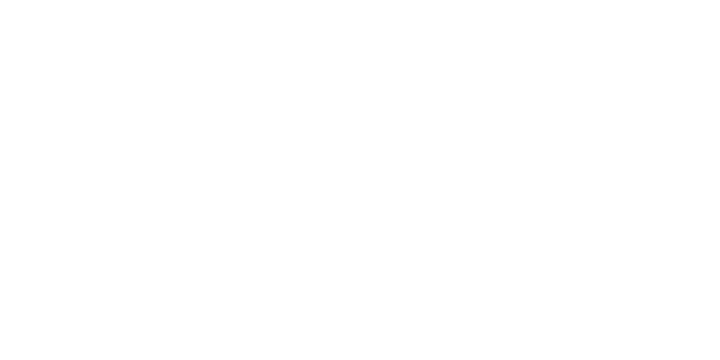

In [93]:
# Want to compare distances across categories

options(repr.plot.width=6, repr.plot.height=3)

df.no0 = df %>%
    #filter(!is.na(Severity_Class_1))%>%
    #filter(!is.na(Severity_Class_2))%>%
    filter(Severity_Class!="Different")%>%
    filter(Sample_ID_1 != Sample_ID_2)%>%
    filter(Land_Class != "Different")%>%
    #filter(Veg_Comm != "Different")%>%
    filter(Org_or_Min != "Different")

df.no0$Org_or_Min = as.factor(df.no0$Org_or_Min)
levels(df.no0$Org_or_Min) = c("Mineral","Organic")

p = ggplot(df.no0 , aes(y=Fun_dist, x=Severity_Class, colour=Severity_Class,fill=Severity_Class))
p = p + geom_boxplot(alpha=0.6) #+ scale_color_gradient(low="yellow",high="red3")
palette=wes_palette("Darjeeling",4)[3:1]
p = p + scale_color_manual(values=palette)
p = p + scale_fill_manual(values=palette)
p = p + facet_grid(~Land_Class~Org_or_Min, scales="free") 
#p = p + scale_x_continuous(limits = c(0.2,1))
#p = p + scale_y_continuous(limits = c(0.2,1))
#p = p + geom_abline(slope=0,intercept=1,linetype="dashed")
p = p + labs(y="Bray distance between communities")
p

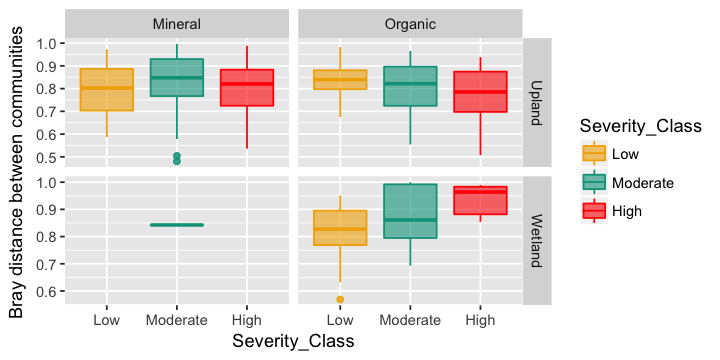

In [94]:
# Want to compare distances across categories

options(repr.plot.width=6, repr.plot.height=3)

df.no0 = df %>%
    #filter(!is.na(Severity_Class_1))%>%
    #filter(!is.na(Severity_Class_2))%>%
    filter(Severity_Class!="Different")%>%
    filter(Sample_ID_1 != Sample_ID_2)%>%
    filter(Land_Class != "Different")%>%
    #filter(Veg_Comm != "Different")%>%
    filter(Org_or_Min != "Different")

df.no0$Org_or_Min = as.factor(df.no0$Org_or_Min)
levels(df.no0$Org_or_Min) = c("Mineral","Organic")

p = ggplot(df.no0 , aes(y=Mb_dist, x=Severity_Class, colour=Severity_Class,fill=Severity_Class))
p = p + geom_boxplot(alpha=0.6) #+ scale_color_gradient(low="yellow",high="red3")
palette=wes_palette("Darjeeling",4)[3:1]
p = p + scale_color_manual(values=palette)
p = p + scale_fill_manual(values=palette)
p = p + facet_grid(~Land_Class~Org_or_Min, scales="free") 
#p = p + scale_x_continuous(limits = c(0.2,1))
#p = p + scale_y_continuous(limits = c(0.2,1))
#p = p + geom_abline(slope=0,intercept=1,linetype="dashed")
p = p + labs(y="Bray distance between communities")
p